In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "font.size": 10,
    "legend.fontsize": 6,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    })

--------------------------------

# Results


### PINN: 

Network: [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]

Num Param: 3.02k

Training time: 196.4157

Error u: 3.760963e-03


### QRes-PINN: 
Network: [2, 10, 10, 10, 10, 10, 10, 10, 10, 1]

Num Param: 1.54k

Training time: 263.2693

Error u: 3.386065e-03

Percentage Improvement:

9.96814%

### QShortcut-PINN: 
Network: [2, 10, 10, 10, 10, 10, 10, 10, 10, 1]

Num Param: 1.54k

Training time: 239.8264

Error u: 3.875324e-03


### IShortcut-PINN: 
Network: [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]

Num Param: 3.02k

Training time: 172.8003

Error u: 1.503571e-02


------------------------------

## Using Adam (Training Epochs = 7000)

### APINN:

Network: [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]

Num Param: 3.02k

Training time: 268.9726

Error u: 1.419975e-01


### QRes-PINN: 

Network: [2, 14, 14, 14, 14, 14, 14, 14, 14, 1]

Num Param: 2.94k

Training time: 332.4766

Error u: 8.629619e-02


### QRes-PINN (lite): 

Network: [2, 10, 10, 10, 10, 10, 10, 10, 10, 1]

Num Param: 1.54k

Training time: 316.1707

Error u: 1.290709e-01

## Count Number of Parameters

In [2]:
l = [2, 20, 20, 20, 20, 20, 20, 20, 20, 1]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] + l[i+1]
print("PINN Num params: %.2fk" % np.round(num_param / 1000, 2))

PINN Num params: 3.02k


In [3]:
l = [2, 10, 10, 10, 10, 10, 10, 10, 10, 1]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] * 2 + l[i+1]
print("QRes-lite Num params: %.2fk" % np.round(num_param / 1000, 2))

QRes-lite Num params: 1.54k


In [4]:
l = [2, 14, 14, 14, 14, 14, 14, 14, 14, 1]
num_param = 0
for i in range(len(l)-1):
    num_param += l[i] * l[i+1] * 2 + l[i+1]
print("QRes-full Num params: %.2fk" % np.round(num_param / 1000, 2))

QRes-full Num params: 2.94k



--------------------------------

# Training Loss


In [5]:
pinn = np.load("loss/loss_PINNs.npy")
qres = np.load("loss/loss_QRes.npy")
qres_adam = np.load("loss/loss_QRes_Adam.npy")
qres_adam_lite = np.load("loss/loss_QRes_Adam_lite.npy")
apinn = np.load("loss/loss_APINNs.npy")

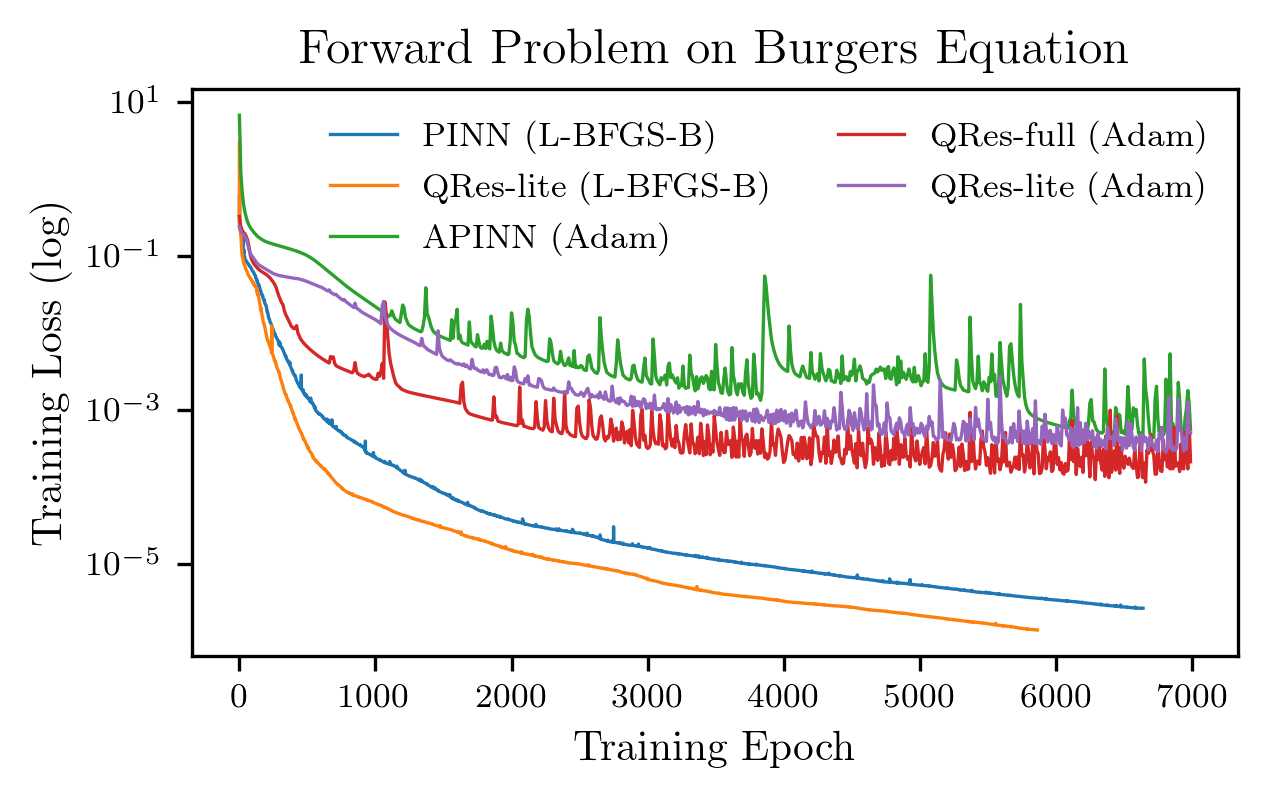

In [7]:
fig, ax = plt.subplots(dpi=300, figsize=(4.5, 2.5))

x_apinn = np.arange(len(apinn)) * 10
x_qres_adam = np.arange(len(qres_adam)) * 10

sns.lineplot(data=pinn, label='PINN (L-BFGS-B)', alpha=1, lw=0.8, ax=ax)
sns.lineplot(data=qres, label='QRes-lite (L-BFGS-B)', alpha=1, lw=0.8, ax=ax)
sns.lineplot(x=x_apinn, y=apinn, label='APINN (Adam)', alpha=1, lw=0.8, ax=ax)
sns.lineplot(x=x_qres_adam, y=qres_adam, label='QRes-full (Adam)', alpha=1, lw=0.8, ax=ax)
sns.lineplot(x=x_qres_adam, y=qres_adam_lite, label='QRes-lite (Adam)', alpha=1, lw=0.8, ax=ax)
ax.set_xlabel('Training Epoch', fontsize=10)
ax.set_ylabel('Training Loss (log)', fontsize=10)
ax.set_title('Forward Problem on Burgers Equation', fontsize=12)
ax.set_yscale('log')
ax.legend(loc='upper right', frameon=False, bbox_to_anchor=(1.0, 1.0), ncol=2, fontsize=8)
l = ax.get_legend()
l.set_title('')
l.get_frame().set_linewidth(0.0)


fig.savefig('figures/loss_curves_burgers.pdf', dpi=300, bbox_inches='tight')
fig.show()
plt.show()